In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('countries of the world.csv')

In [3]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

In [6]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

In [8]:
data.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [9]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 14.09375, 'Columns'),
 Text(33.0, 0.5, 'Data Points')]

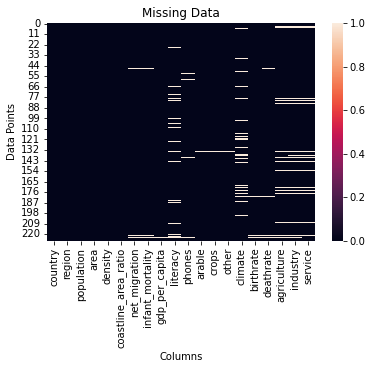

In [10]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [11]:
data.loc[[27,51, 101, 118, 219], ['country', 'population', 'area', 'coastline_area_ratio', 'gdp_per_capita']]

,country,population,area,coastline_area_ratio,gdp_per_capita
27,Brazil,188078227,8511965,0.09,7600.0
51,Cuba,11382820,110860,3.37,2900.0
101,Italy,58133509,301230,2.52,26700.0
118,Libya,5900754,1759540,0.10,6400.0
219,Vietnam,84402966,329560,1.05,2500.0


In [12]:
data.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


In [13]:
data.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [14]:
h1 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1].head()
h2 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2].head()
h3 = data.loc[:, ['country', 'region', 'climate']][data.climate == 3].head()
h4 = data.loc[:, ['country', 'region', 'climate']][data.climate == 4].head()
h5 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1.5].head()
h6 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


## Data Cleaning

In [15]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


In [16]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace= True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

In [17]:
print(data.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


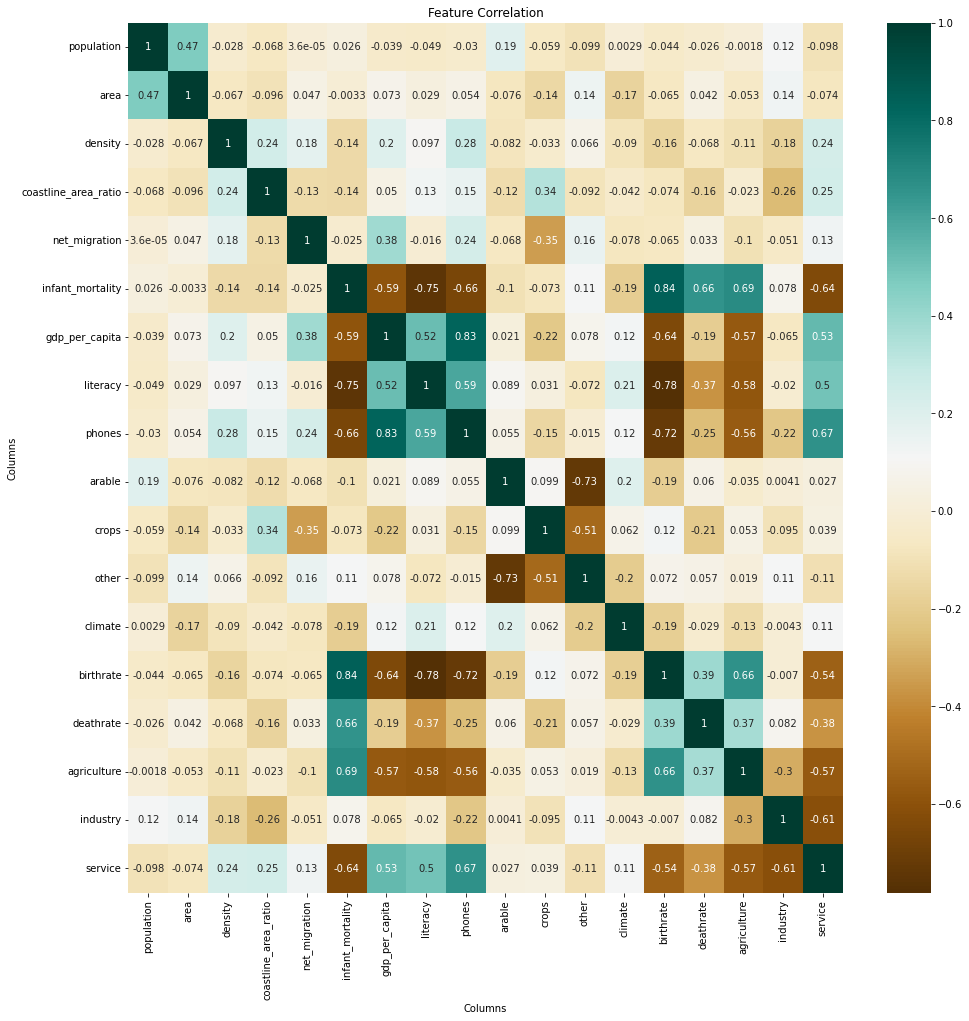

In [18]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

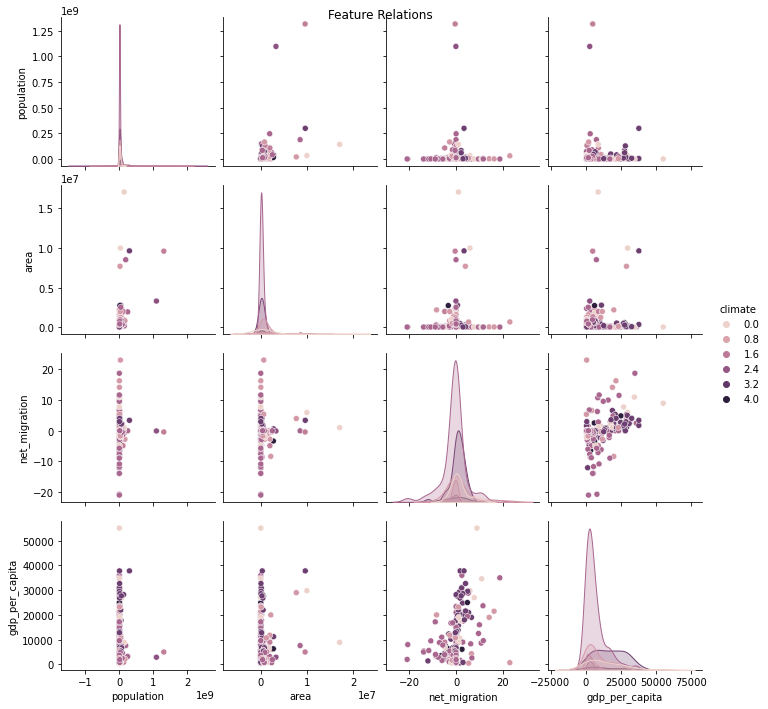

In [19]:
g = sns.pairplot(data[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()


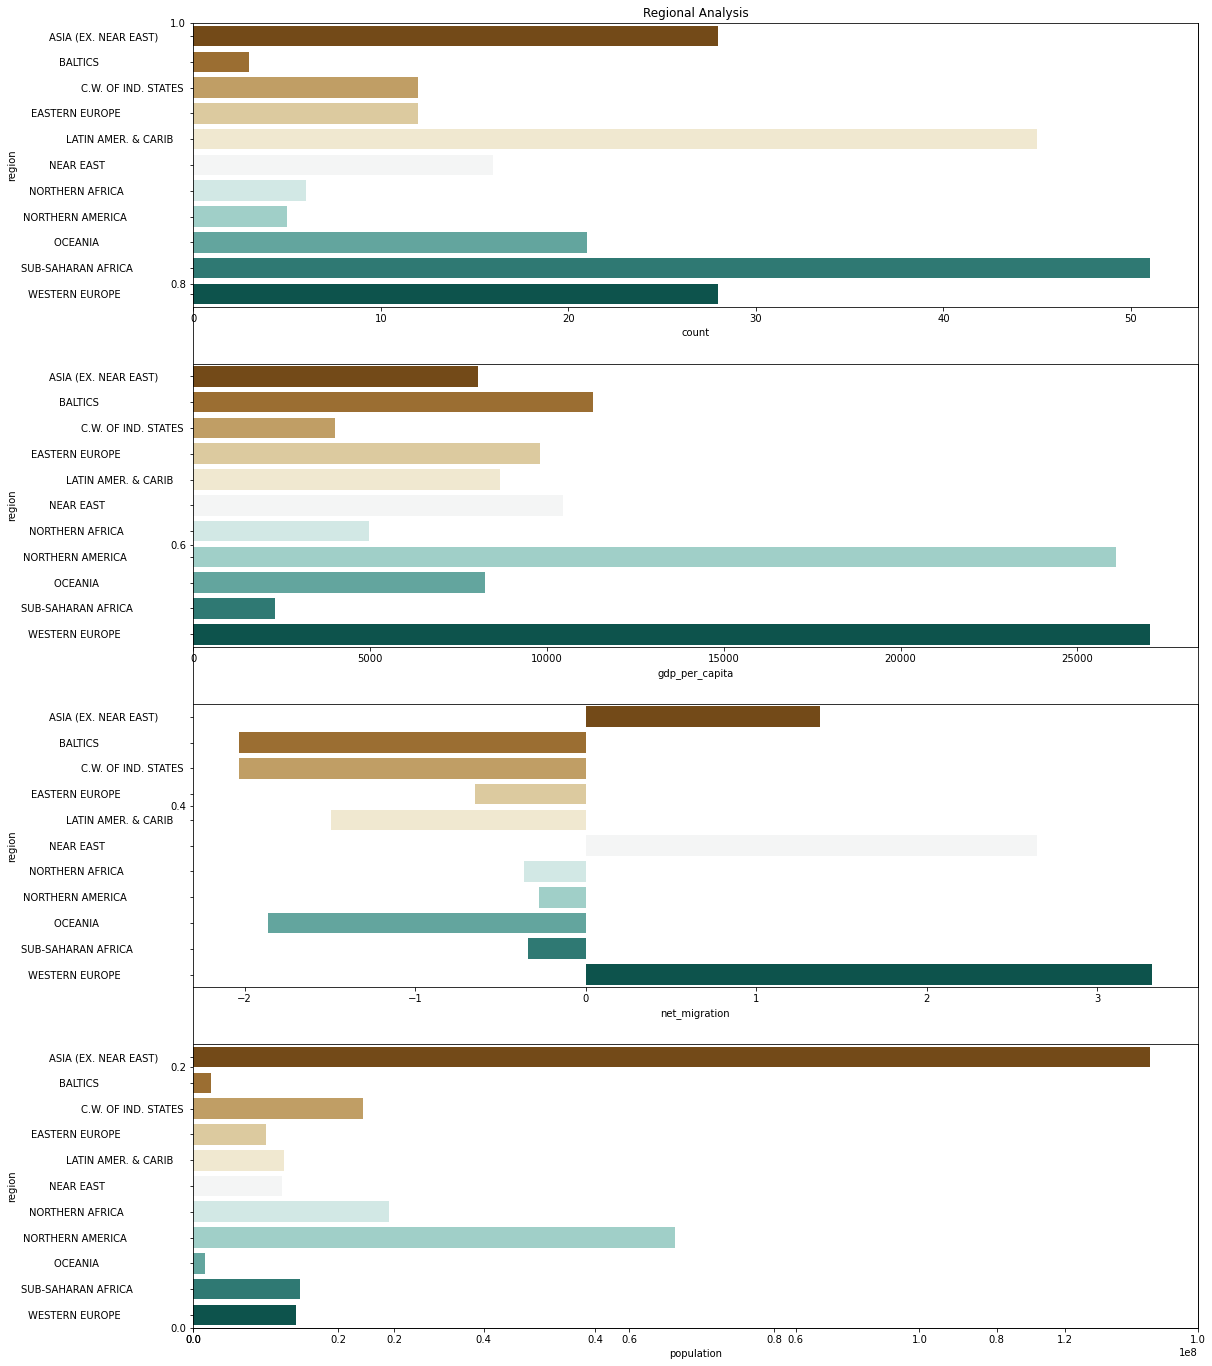

In [20]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= data, y= 'region', ax= ax1, palette='BrBG')
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, palette='BrBG', ci= None)
plt.show()

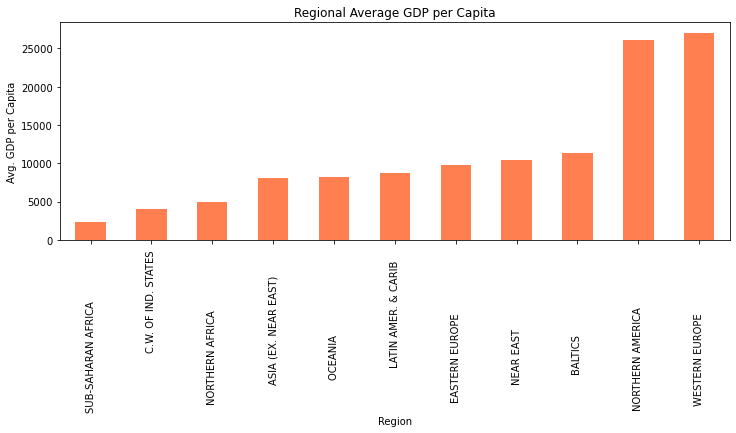

In [21]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()


<Figure size 864x864 with 0 Axes>

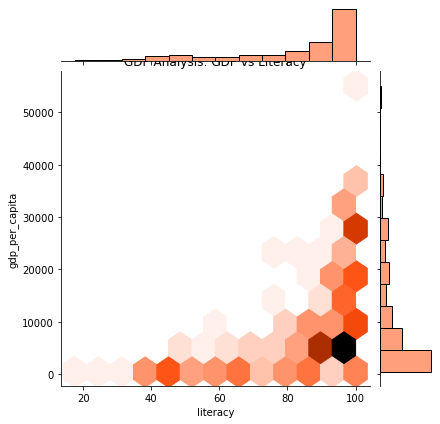

In [22]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'literacy', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.title('GDP Analysis: GDP vs Literacy')
plt.show()

<Figure size 864x864 with 0 Axes>

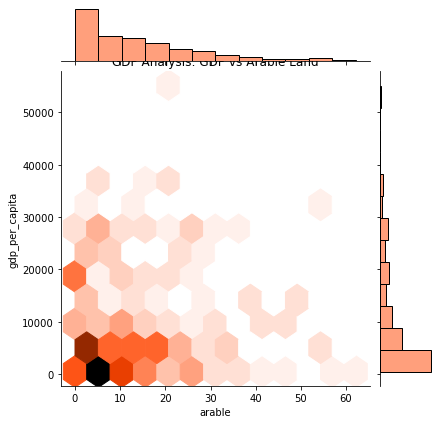

In [23]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'arable', y= 'gdp_per_capita', kind= 'hex', color='coral')
plt.title('GDP Analysis: GDP vs Arable Land')
plt.show()

<Figure size 864x864 with 0 Axes>

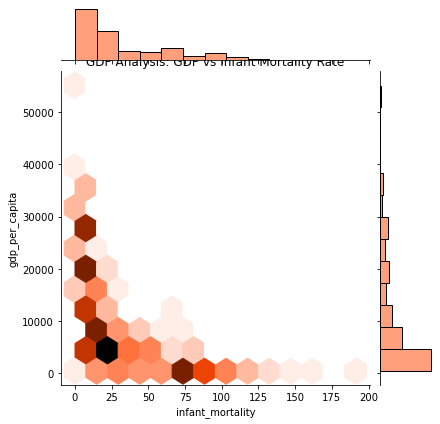

In [24]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.title('GDP Analysis: GDP vs Infant Mortality Rate')
plt.show()

In [25]:
data_final = pd.concat([data,pd.get_dummies(data['region'], prefix='region')], axis=1).drop(['region'],axis=1)
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

In [26]:
data_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


In [27]:
y = data_final['gdp_per_capita']
X = data_final.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [29]:
y3 = y
X3 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

In [30]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [31]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

In [32]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

Linear Regression Performance:

all features, No scaling:
MAE: 330350.8586601308
RMSE: 1570337.5456389682
R2_Score:  -29843.120383349047

all features, with scaling:
MAE: 569019.4687586192
RMSE: 1283170.8219647529
R2_Score:  -19925.990118447924

selected features, No scaling:
MAE: 2965.93572293987
RMSE: 4088.7945802479385
R2_Score:  0.7976685756859009

selected features, with scaling:
MAE: 2879.5213243944418
RMSE: 3756.436588502966
R2_Score:  0.829224770271209


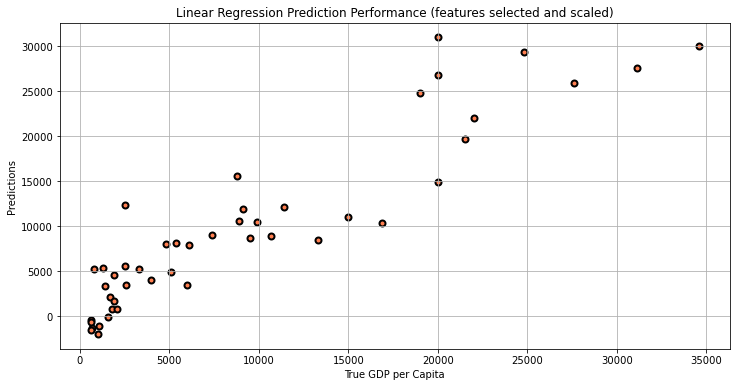

In [33]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

In [34]:
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

SVR()

In [35]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

SVM Performance:

all features, No scaling:
MAE: 7049.984895264721
RMSE: 9811.73631340298
R2_Score:  -0.16510345624387246

all features, with scaling:
MAE: 7042.737596769212
RMSE: 9800.406046613498
R2_Score:  -0.16241416444556656

selected features, No scaling:
MAE: 7047.711927073501
RMSE: 9807.997922107874
R2_Score:  -0.16421578810668724

selected features, with scaling:
MAE: 7040.043820847137
RMSE: 9794.58886537642
R2_Score:  -0.1610346364957338


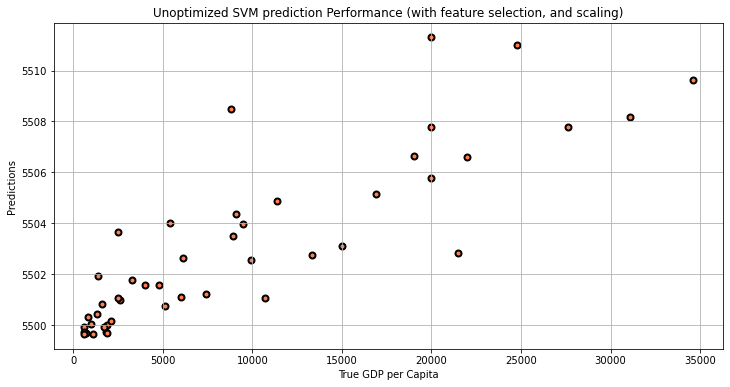

In [36]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

In [37]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [38]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.324 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.372 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.158 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.117 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.373 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [40]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [41]:
grid_predictions = grid.predict(X4_test)

MAE: 6386.413128432553
RMSE: 9133.499345710767
R2_Score:  -0.009594923559210988


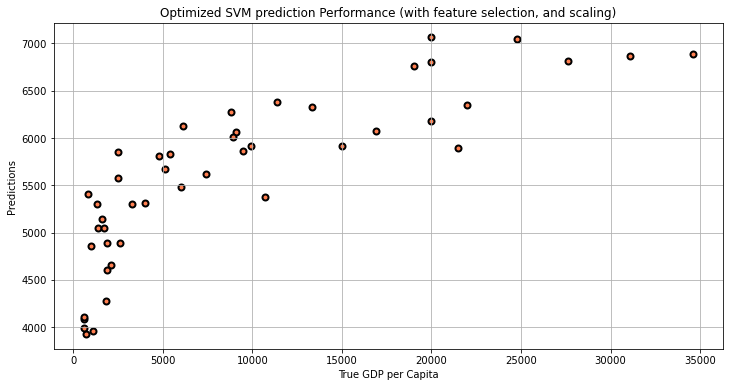

In [42]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

In [43]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=200, random_state=101)

In [44]:
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

Random Forest Performance:

all features, No scaling:
MAE: 2142.1304347826085
RMSE: 3097.1944738255706
R2_Score:  0.8839060185534444

selected features, No scaling:
MAE: 2416.0652173913045
RMSE: 3533.590316058036
R2_Score:  0.8488858452472634


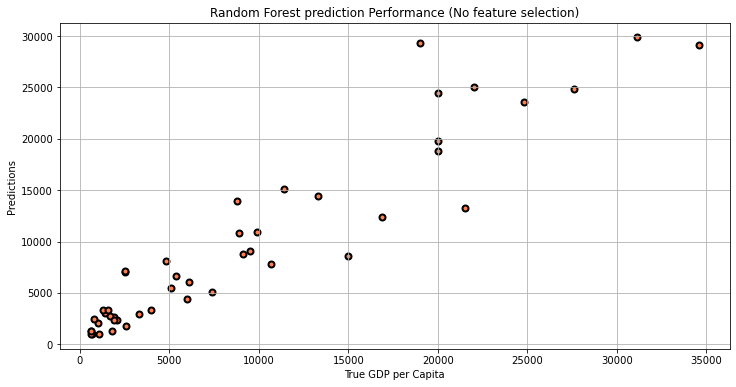

In [45]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

In [46]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]} 
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]})

In [47]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [48]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000)

In [49]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 2255.971739130435
RMSE: 3131.9129243753837
R2_Score:  0.8812886859942628


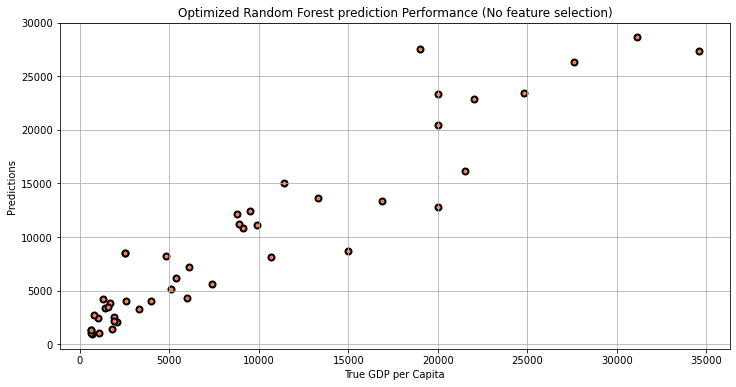

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

In [51]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

In [52]:
gbm1_pred = gbm1.predict(X_test)
gbm3_pred = gbm3.predict(X3_test)

Gradiant Boosting Performance:

all features, No scaling:
MAE: 2280.4625959347395
RMSE: 3413.6352435789836
R2_Score:  0.8589714692004253

selected features, No scaling:
MAE: 2467.2081266874507
RMSE: 3789.2979753946875
R2_Score:  0.8262238105475073


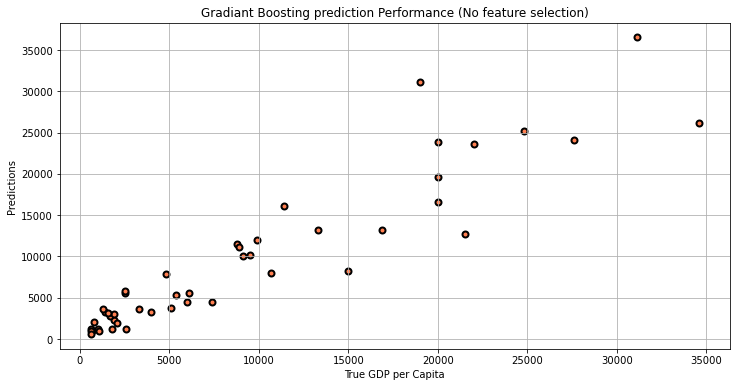

In [53]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

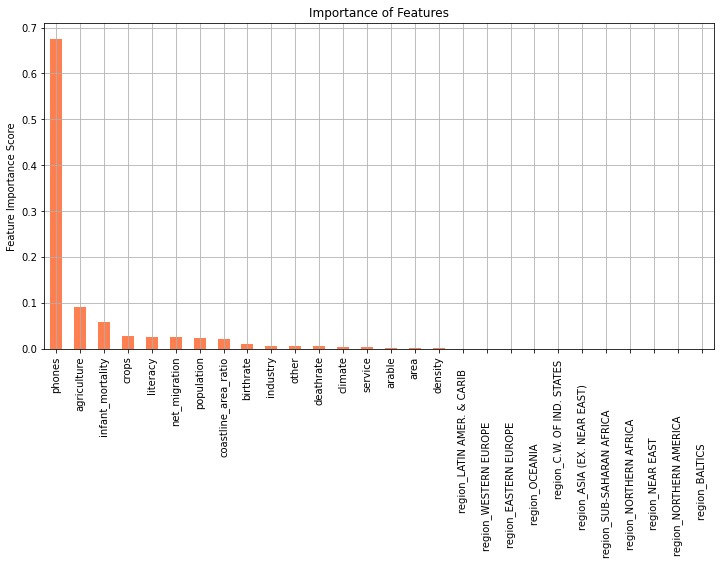

In [54]:
feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [ ]:
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)

In [ ]:
gbm_grid_predictions = gbm_tuning.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

In [ ]:
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1, 
                                    subsample=0.7,max_features=7, random_state=101)
gbm_opt.fit(X_train,y_train)
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()